# This notebook documents the steps taken to produce the analysis presented on: 


### 1. scrape Google Maps listings with search term "chicken rice in Singapore" and save them to a csv file. I did so using a free scraping software called "Google Maps Extractor" (https://github.com/omkarcloud/google-maps-scraper). 
<br>

### 2. Load the csv file into Jupyter Notebook. 

In [79]:
import pandas as pd


# Reload dataset
df = pd.read_csv('sg-chicken-rice.csv')
df.head()

,Index,name,reviews,rating,featured_image,main_category,workday_timing,closed_on,address,review_keywords,link,planning_area
0,1,Mian Ji Fan chicken rice,42,4.6,https://lh3.googleusercontent.com/gps-cs-s/AC9...,Hawker Stall,10 am-2 pm,"Monday, Thursday, Saturday","153 Serangoon North Ave 1, #01-512, Singapore ...","price, queue, achar, chili, ginger, cucumber, ...",https://www.google.com/maps/place/Mian+Ji+Fan+...,Serangoon
1,2,Nam Kee Chicken Rice Restaurant,827,4.2,https://lh3.googleusercontent.com/p/AF1QipMy1_...,Chicken restaurant,10:45 am-8:30 pm,Open All Days,"201 Upper Thomson Rd, Singapore 574343","school, hainanese chicken rice, steamed chicke...",https://www.google.com/maps/place/Nam+Kee+Chic...,Bishan
2,3,OK Chicken Rice & Humfull Laksa (Hougang),349,4.4,https://lh3.googleusercontent.com/gps-cs-s/AC9...,Hawker Stall,9 am-8:30 pm,Open All Days,"932 Hougang Ave 9, #01-04, Singapore 530932","roasted chicken rice, steam chicken, halal, co...",https://www.google.com/maps/place/OK+Chicken+R...,Hougang
3,4,Ming Kee Chicken Rice,475,3.8,https://lh3.googleusercontent.com/p/AF1QipMGs_...,Hawker Stall,10 am-8 pm,Tuesday,"511 Bishan St. 13, #01-522 Kim San Leng Coffee...","skin, chilli sauce, chicken breast, steamed ch...",https://www.google.com/maps/place/Ming+Kee+Chi...,Bishan
4,5,Sin Ming Rd Chicken Rice Xin Min Lu Ji Fan,295,4.4,https://lh3.googleusercontent.com/gps-cs-s/AC9...,Restaurant,10:30 am-8 pm,Open All Days,"151 Bishan St.11, #01- 195 Block 151, Singapor...","roasted chicken, chilli, steamed chicken, air-...",https://www.google.com/maps/place/Sin+Ming+Rd+...,Bishan


### 3. The workday_timing column contains information on each stall's opening hours. In its current format however, it's not very useful data to work with. Using datetime conversion and regular expressions, I split the workday_timing into opening and closing times by 24-hour format.

In [71]:
times = df['workday_timing'].str.split('-', n=1, expand=True)

opening_raw = times[0].str.strip().str.lower().replace(
    r'^(\d{1,2})\s*(am|pm)$', r'\1:00 \2', regex=True
)
closing_raw = times[1].str.strip().str.lower().replace(
    r'^(\d{1,2})\s*(am|pm)$', r'\1:00 \2', regex=True
)

opening_times = []
for s in opening_raw:
    dt = pd.to_datetime(s, infer_datetime_format=True, errors='coerce')
    if pd.notna(dt):
        opening_times.append(dt.strftime('%H:%M'))
    else:
        opening_times.append(None)

closing_times = []
for s in closing_raw:
    dt = pd.to_datetime(s, infer_datetime_format=True, errors='coerce')
    if pd.notna(dt):
        closing_times.append(dt.strftime('%H:%M'))
    else:
        closing_times.append(None)

df['opening_time'] = opening_times
df['closing_time'] = closing_times

df.drop(columns=['workday_timing'], inplace=True)

# 5. Save updates back to the same CSV
df.to_csv("sg-chicken-rice-timecleaned", index=False)



C:\Users\twtay\AppData\Local\Temp\ipykernel_43544\2037100984.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dt = pd.to_datetime(s, infer_datetime_format=True, errors='coerce')
C:\Users\twtay\AppData\Local\Temp\ipykernel_43544\2037100984.py:20: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dt = pd.to_datetime(s, infer_datetime_format=True, errors='coerce')


### 4. Next, I wanted to investigate if the collected data showed any patterns that might suggest the emergence of franchises. I found that the collected data suggests otherwise. The dataset I put together is no conclusive though, but hypothesis is invalid within the scope of this exercise. 

In [72]:
df.to_csv("sg-chicken-rice-timecleaned.csv")
df.head()


,Index,name,reviews,rating,featured_image,main_category,closed_on,address,review_keywords,link,planning_area,opening_time,closing_time
0,1,Mian Ji Fan chicken rice,42,4.6,https://lh3.googleusercontent.com/gps-cs-s/AC9...,Hawker Stall,"Monday, Thursday, Saturday","153 Serangoon North Ave 1, #01-512, Singapore ...","price, queue, achar, chili, ginger, cucumber, ...",https://www.google.com/maps/place/Mian+Ji+Fan+...,Serangoon,10:00,14:00
1,2,Nam Kee Chicken Rice Restaurant,827,4.2,https://lh3.googleusercontent.com/p/AF1QipMy1_...,Chicken restaurant,Open All Days,"201 Upper Thomson Rd, Singapore 574343","school, hainanese chicken rice, steamed chicke...",https://www.google.com/maps/place/Nam+Kee+Chic...,Bishan,10:45,20:30
2,3,OK Chicken Rice & Humfull Laksa (Hougang),349,4.4,https://lh3.googleusercontent.com/gps-cs-s/AC9...,Hawker Stall,Open All Days,"932 Hougang Ave 9, #01-04, Singapore 530932","roasted chicken rice, steam chicken, halal, co...",https://www.google.com/maps/place/OK+Chicken+R...,Hougang,09:00,20:30
3,4,Ming Kee Chicken Rice,475,3.8,https://lh3.googleusercontent.com/p/AF1QipMGs_...,Hawker Stall,Tuesday,"511 Bishan St. 13, #01-522 Kim San Leng Coffee...","skin, chilli sauce, chicken breast, steamed ch...",https://www.google.com/maps/place/Ming+Kee+Chi...,Bishan,10:00,20:00
4,5,Sin Ming Rd Chicken Rice Xin Min Lu Ji Fan,295,4.4,https://lh3.googleusercontent.com/gps-cs-s/AC9...,Restaurant,Open All Days,"151 Bishan St.11, #01- 195 Block 151, Singapor...","roasted chicken, chilli, steamed chicken, air-...",https://www.google.com/maps/place/Sin+Ming+Rd+...,Bishan,10:30,20:00


In [73]:
df['name'].value_counts()



name
Tong Fong Fatt Hainanese Boneless Chicken Rice          7
Boon Chiang Hainanese Chicken Rice                      3
Xing Le Xing Hainanese Chicken Rice                     3
Five Star Kampung Chicken Rice & Kitchen                3
Mian Ji Fan chicken rice                                2
                                                       ..
No Name mkn haus                                        1
Bee Hong Kee @Singapura Heritage Seletar Mall           1
GAGA Roasted Delights Ga Ga Shao La @ Rivervale Mall    1
Hup Kee Roast Duck (Compassvale Lane)                   1
King of Chicken Rice                                    1
Name: count, Length: 141, dtype: int64

### 5. I decided to examine how accessible chicken rice really is in Singapore. I do so by determining the number of chicken rice stalls by planning area.I also included an average rating column to see if the average chicken rice rating fluctuated significantly across planning areas. 

### The figures below are interesting. While the dataset is not comprehensive, the analysis suggests that chicken rice stalls with an online presence are largely clustered in a few planning areas - could these be areas where newer flats are built?

In [81]:
display(df.groupby('planning_area').agg(counts = ("planning_area", "count"), avg_rating = ("rating", 'mean')).reset_index().sort_values(by = 'counts',ascending=False))

df.to_csv('sg-chicken-rice-by-area.csv')



,planning_area,counts,avg_rating
19,Sengkang,37,3.656757
0,Ang Mo Kio,24,3.916667
9,Hougang,20,3.705000
20,Serangoon,13,3.615385
2,Bishan,11,4.145455
16,Punggol,9,2.633333
22,Toa Payoh,8,3.600000
11,Kallang,7,4.285714
13,Novena,5,3.900000
12,Marine Parade,4,3.600000


### 6. Desk research suggests that the following towns are where newer flat building and renovation projects have been launched. 

In [75]:
new_flat_towns = [
    'Bidadari', 'Punggol', 'Sengkang', 'Tampines', 'Yishun', 
    'Ulu Pandan', 'Tanjong Rhu', 'Woodlands', 'Hougang', 
    'Ang Mo Kio', 'Bukit Batok', 'Serangoon', 'Fernvale', 
    'Farrer Park', 'Toa Payoh', 'Bishan', 'Jurong East', 
    'Jurong West', 'Pasir Ris'
]

### 7. Next, I filter the planning_area column by this list to count the number of stalls in districts with new flat projects versus districts which have not seen any new flats built in the last 10 years. We can see that the number of chicken rice stalls with an online presence that are located in estates with newer flats is more than thrice as high as their peers located in estates which have not seen any new development.

In [76]:
valid_towns = []

for town in new_flat_towns:
    if town in df['planning_area'].unique():
        valid_towns.append(town)

new_flat_towns_df = df[df['planning_area'].isin(valid_towns)]
non_new_flat_towns_df = df[~df['planning_area'].isin(valid_towns)]

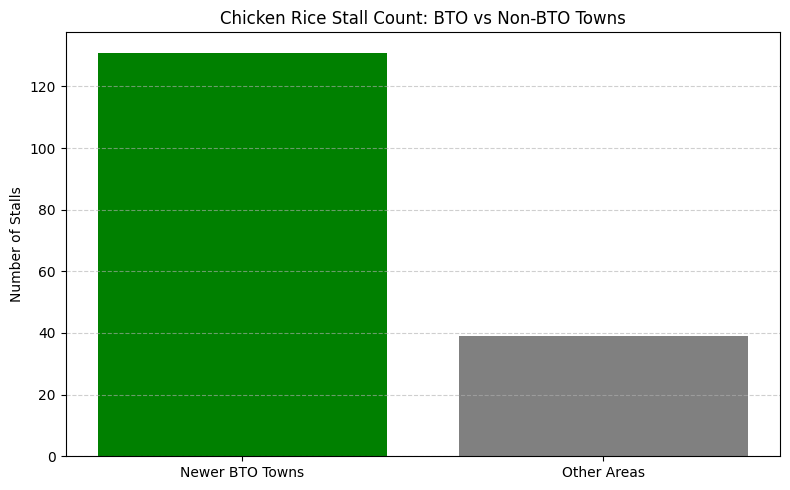

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['Newer BTO Towns', 'Other Areas']
values = [len(new_flat_towns_df), len(non_new_flat_towns_df)]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=['green', 'gray'])

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height), 
             ha='center', va='bottom', fontsize=12)

# Styling
plt.title('Chicken Rice Stall Count: BTO vs Non-BTO Towns')
plt.ylabel('Number of Stalls')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
